<a href="https://colab.research.google.com/github/bhaktjain/Stock-Market-Movement-Predictor/blob/development/model/LSTM_try_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [2]:
# stock_data = pd.read_csv("https://drive.google.com/file/d/1Ym4sWIkeZvHcYNX1frKXG5p22dPrFXBH/view?usp=sharing")
# news = pd.read_csv("https://drive.google.com/file/d/13LVBZX2M43PRYAd-JanMpgdH8CCAFrWI/view?usp=sharing")

# Loading the Data

In [3]:
stock = pd.read_csv('final_stock_data.csv')

In [4]:
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.0,0.0,1
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.0,0.0,1
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.0,0.0,0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.0,0.0,0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.0,0.0,1


# Data Cleaning

In [5]:
stock['Dividends'].value_counts()

0.000000    1962
0.130000       4
0.142500       4
0.157500       4
0.182500       4
0.117500       3
0.192500       3
0.220000       3
0.108929       2
0.094643       1
0.230000       1
Name: Dividends, dtype: int64

In [6]:
stock['Stock Splits'].value_counts()

0.0    1990
7.0       1
Name: Stock Splits, dtype: int64

In [7]:
stock.drop(['Dividends','Stock Splits'], axis=1, inplace=True)

In [8]:
stock.head()

,Date,Open,High,Low,Close,Volume,Movement
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,1
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,1
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,1


In [9]:
stock.shape

(1991, 7)

In [10]:
stock.describe()

,Open,High,Low,Close,Volume,Movement
count,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1991.000000
mean,47.666381,48.156931,47.202549,47.699269,1.911982e+08,0.529884
std,43.124547,43.674071,42.629523,43.175678,1.540023e+08,0.499232
min,12.022059,12.382439,11.933125,12.101386,4.100000e+07,0.000000
25%,22.852884,23.085305,22.620846,22.866225,9.642320e+07,0.000000
50%,31.029067,31.217623,30.904150,31.210552,1.371600e+08,1.000000
75%,48.032189,48.548661,47.523433,48.196890,2.248612e+08,1.000000
max,182.130025,182.439174,178.629624,181.511703,1.460852e+09,1.000000


In [11]:
stock.isnull().sum() # checking for null values

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Movement    0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8471ca7d0>,
      dtype=object)

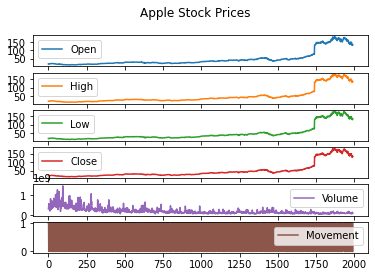

In [12]:
stock.plot.line(subplots = True, title='Apple Stock Prices')

In [13]:
labels = pd.read_csv('news_label.csv')

In [14]:
labels.head()

,Date,Sentiment
0,2012-07-16,0.0
1,2012-07-19,0.0
2,2012-07-23,0.0
3,2012-07-24,0.0
4,2012-07-27,0.0


In [15]:
labels.shape

(1991, 2)

In [44]:
dataset = pd.merge(stock, labels)
x = dataset.drop(['Movement'], axis=1)
x

,Date,Open,High,Low,Close,Volume,Sentiment
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.000000
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.000000
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.000000
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.000000
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.000000
...,...,...,...,...,...,...,...
1986,2022-06-15,134.289993,137.339996,132.160004,135.429993,91533000,0.000000
1987,2022-06-16,132.080002,132.389999,129.039993,130.059998,108123900,-0.833333
1988,2022-06-17,130.070007,133.080002,129.809998,131.559998,134118500,0.058824
1989,2022-06-21,133.419998,137.059998,133.320007,135.869995,81000500,0.600000


In [45]:
y = dataset['Movement']

In [46]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1986    1
1987    0
1988    1
1989    1
1990    0
Name: Movement, Length: 1991, dtype: int64

# Splitting the dataset into train and test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
##X_train = x.iloc[:1590]
#X_test = x.iloc[1590:]
#y_train = y.iloc[:1590]
#y_test = y.iloc[1590:]

In [54]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1692, 7) (299, 7) (1692,) (299,)


In [55]:
X_test

,Date,Open,High,Low,Close,Volume,Sentiment
1692,2019-11-18,65.298137,65.698575,64.912446,65.617508,86703200,0.000000
1693,2019-11-19,65.814030,65.838598,65.197412,65.418510,76167200,0.397260
1694,2019-11-20,65.234262,65.366916,63.971533,64.656944,106234400,0.153846
1695,2019-11-21,64.779783,64.858398,64.163158,64.367065,121395200,0.153846
1696,2019-11-22,64.509551,64.654494,64.079635,64.310562,65325200,0.400000
...,...,...,...,...,...,...,...
1986,2022-06-15,134.289993,137.339996,132.160004,135.429993,91533000,0.000000
1987,2022-06-16,132.080002,132.389999,129.039993,130.059998,108123900,-0.833333
1988,2022-06-17,130.070007,133.080002,129.809998,131.559998,134118500,0.058824
1989,2022-06-21,133.419998,137.059998,133.320007,135.869995,81000500,0.600000


In [60]:
X_train = X_train.drop(['Date'],axis=1)

In [61]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_data_scaled = sc.fit_transform(X_train)

# Modelling

In [65]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[0], X_train.shape[1])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(128))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1692, 50)          11400     
                                                                 
 dropout_1 (Dropout)         (None, 1692, 50)          0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 128)               6528      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38,257
Trainable params: 38,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train)